In [1]:
import os
import pandas as pd
import numpy as np
data = pd.read_csv("testtdmodel1.csv", sep=',', encoding='gb18030')


In [2]:
columns_model = ['1个月内借款人身份证申请借款平台数','7天内关联P2P网贷平台数','3个月内关联P2P网贷平台数','3个月手机号关联身份证数','3个月内申请人关联融资租赁平台数','二度风险名单个数','是否命中身份证风险关注名单','原始分','一度风险名单个数']
X_model = data[columns_model]  #生成入模自变量
y = data['y']                  #生成入模因变量

In [3]:
from sklearn.model_selection import train_test_split  #导入区分训练集和测试集的模块

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_model, y, test_size=0.3)

In [6]:
from sklearn import tree  #导入sklearn中的树模块

clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=100)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

import graphviz

dot_data = tree.export_graphviz(clf,
                               out_file =None,
                               feature_names = columns_model,
                               filled = True,
                               rounded = True
                               )
print("criterion=",'entropy',"score=",score)
graph = graphviz.Source(dot_data.replace('helvetica','Microsoft YaHei'), encoding='utf-8')
graph.render(filename='MyPicture',view=True)   #结果保存在MyPicture.pdf中

criterion= entropy score= 0.9903492647058824


'MyPicture.pdf'

[Text(0.5, 0.75, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.5, '  False')]

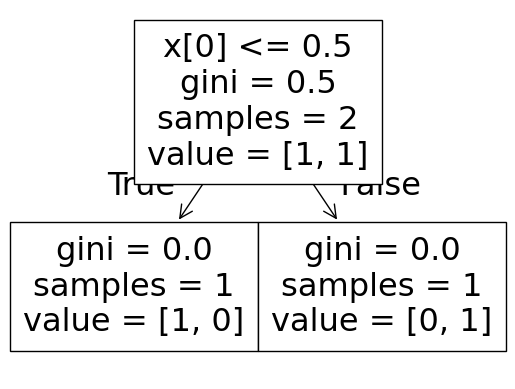

In [13]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[2., 2.]])
tree.plot_tree(clf)

In [12]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

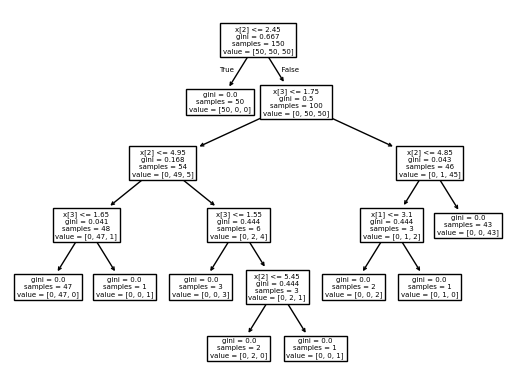

In [10]:
tree.plot_tree(clf)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split  # 划分训练集与测试集
from sklearn.tree import DecisionTreeClassifier   # 决策树
from sklearn import metrics      # 模型评估模块
import graphviz                # 图形可视化，用户可视化决策树
from sklearn import tree       # sklearn中的树模块，用于导出决策数的dot格式
from sklearn.model_selection import ParameterGrid, GridSearchCV  # 网格搜索

In [18]:
acc1 = pd.read_csv("data1.csv", encoding='gbk')
print(acc1)

     计数 年龄 收入 学生 信誉 归类：买计算机？
0    64  青  高  否  良       不买
1    64  青  高  否  优       不买
2   128  中  高  否  良        买
3    60  老  中  否  良        买
4    64  老  低  是  良        买
5    64  老  低  是  优       不买
6    64  中  低  是  优        买
7   128  青  中  否  良       不买
8    64  青  低  是  良        买
9   132  老  中  是  良        买
10   64  青  中  是  优        买
11   32  中  中  否  优        买
12   32  中  高  是  良        买
13   63  老  中  否  优       不买
14    1  老  中  否  优        买


In [19]:
accepts = acc1.drop("计数", axis=1)

In [20]:
accepts

,年龄,收入,学生,信誉,归类：买计算机？
0,青,高,否,良,不买
1,青,高,否,优,不买
2,中,高,否,良,买
3,老,中,否,良,买
4,老,低,是,良,买
5,老,低,是,优,不买
6,中,低,是,优,买
7,青,中,否,良,不买
8,青,低,是,良,买
9,老,中,是,良,买


In [22]:
x = accepts.columns.to_list()

In [24]:
data = accepts[x]
data

,年龄,收入,学生,信誉,归类：买计算机？
0,青,高,否,良,不买
1,青,高,否,优,不买
2,中,高,否,良,买
3,老,中,否,良,买
4,老,低,是,良,买
5,老,低,是,优,不买
6,中,低,是,优,买
7,青,中,否,良,不买
8,青,低,是,良,买
9,老,中,是,良,买
